Данные загружены! Размер: (3000, 20)

Первые 3 строки данных:
  event_id        date  year  month country event_type  severity  \
0  EV01539  2020-01-01  2020      1   Japan    Tsunami         1   
1  EV02303  2020-01-01  2020      1   Qatar  Hurricane         1   
2  EV01796  2020-01-02  2020      1  Canada    Drought         3   

   duration_days  affected_population  deaths  injuries  \
0              1               420956       0         2   
1              4                 3276       1        10   
2              6               120382       0         9   

   economic_impact_million_usd  infrastructure_damage_score  \
0                         0.01                          4.9   
1                         0.00                          3.4   
2                         0.10                          8.9   

   response_time_hours  international_aid_million_usd  latitude  longitude  \
0                   11                            0.0   85.4321   138.7206   
1                  

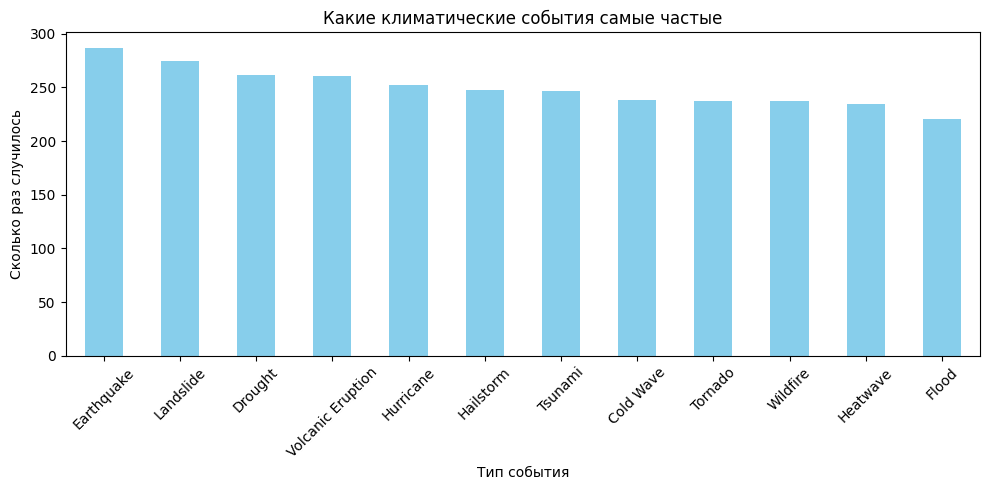

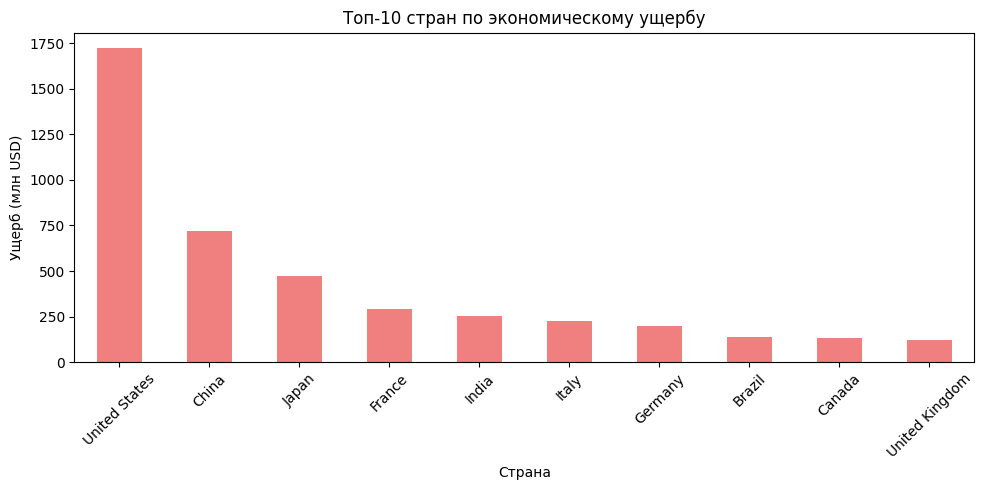

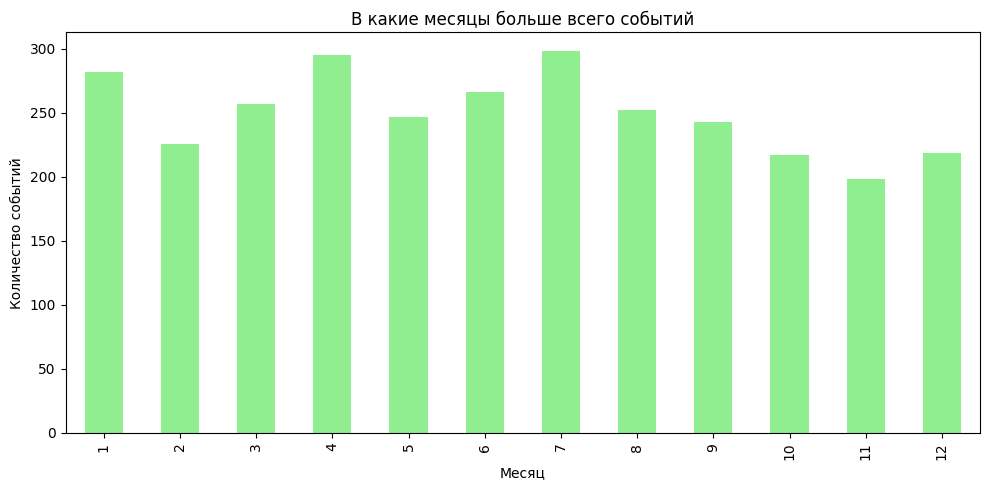


4. ОБРАБОТКА ДАННЫХ
- casualties_per_population (жертвы на население)
- is_major_event (серьезное ли событие)

Средняя тяжесть по типам событий:
- Heatwave: 4.62
- Landslide: 4.53
- Cold Wave: 4.52
- Drought: 4.51
- Wildfire: 4.48
- Tornado: 4.44
- Flood: 4.42
- Hailstorm: 4.40
- Hurricane: 2.58
- Tsunami: 2.46
- Earthquake: 2.46
- Volcanic Eruption: 2.41

5. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
Обработанные данные сохранены в 'simple_climate_analysis.csv'

ИТОГИ АНАЛИЗА
 Проанализировано 3000 климатических событий
 Данные за 6 год(а)
 51 стран
12 типов событий
 Самый частый тип: Earthquake (287 раз)
 Страна с наибольшим ущербом: United States (1723.14 млн USD)

Анализ завершен!


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('global_climate_events_economic_impact_2020_2025.csv')
print(f"Данные загружены! Размер: {df.shape}")

print("\nПервые 3 строки данных:")
print(df.head(3))

print("\nКолонки в данных:")
for col in df.columns:
    print(f"- {col}")

print("\n1. АНАЛИЗ ДАННЫХ")

print(f"Всего событий: {len(df)}")

years = df['year'].unique()
print(f"Года в данных: {sorted(years)}")

event_types = df['event_type'].unique()
print(f"Типы событий: {list(event_types)}")

countries_count = df['country'].nunique()
print(f"Количество стран: {countries_count}")

print("\n2. СТАТИСТИКИ")

avg_severity = df['severity'].mean()
print(f"Средняя тяжесть событий: {avg_severity:.2f}")

max_economic = df['economic_impact_million_usd'].max()
print(f"Максимальный экономический ущерб: {max_economic:.2f} млн USD")

avg_affected = df['affected_population'].mean()
print(f"В среднем затронуто людей: {avg_affected:.0f}")

print("\n3.ГРАФИКИ")

plt.figure(figsize=(10, 5))
event_counts = df['event_type'].value_counts()
event_counts.plot(kind='bar', color='skyblue')
plt.title('Какие климатические события самые частые')
plt.xlabel('Тип события')
plt.ylabel('Сколько раз случилось')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
country_damage = df.groupby('country')['economic_impact_million_usd'].sum()
top_10_countries = country_damage.sort_values(ascending=False).head(10)
top_10_countries.plot(kind='bar', color='lightcoral')
plt.title('Топ-10 стран по экономическому ущербу')
plt.xlabel('Страна')
plt.ylabel('Ущерб (млн USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
monthly_events = df['month'].value_counts().sort_index()
monthly_events.plot(kind='bar', color='lightgreen')
plt.title('В какие месяцы больше всего событий')
plt.xlabel('Месяц')
plt.ylabel('Количество событий')
plt.tight_layout()
plt.show()

print("\n4. ОБРАБОТКА ДАННЫХ")

df['casualties_per_population'] = df['total_casualties'] / df['affected_population'].replace(0, 1)
df['is_major_event'] = (df['severity'] > 5).astype(int)

print("- casualties_per_population (жертвы на население)")
print("- is_major_event (серьезное ли событие)")

print("\nСредняя тяжесть по типам событий:")
severity_by_type = df.groupby('event_type')['severity'].mean().sort_values(ascending=False)
for event_type, severity in severity_by_type.items():
    print(f"- {event_type}: {severity:.2f}")

print("\n5. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")

columns_to_save = [
    'year', 'month', 'country', 'event_type', 'severity',
    'economic_impact_million_usd', 'affected_population',
    'casualties_per_population', 'is_major_event'
]

simple_df = df[columns_to_save].copy()
simple_df.to_csv('simple_climate_analysis.csv', index=False)

print("Обработанные данные сохранены в 'simple_climate_analysis.csv'")

print("\nИТОГИ АНАЛИЗА")
print(f" Проанализировано {len(df)} климатических событий")
print(f" Данные за {len(years)} год(а)")
print(f" {countries_count} стран")
print(f"{len(event_types)} типов событий")
print(f" Самый частый тип: {event_counts.index[0]} ({event_counts.iloc[0]} раз)")
print(f" Страна с наибольшим ущербом: {top_10_countries.index[0]} ({top_10_countries.iloc[0]:.2f} млн USD)")


print("\nАнализ завершен!")